##**Question 1: Backpropagation for XOR Gate**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Defining the functions for forward and backpropagation

In [2]:
from sklearn.metrics import accuracy_score as ACC

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigm_der(z):
    one = np.ones((z.shape))
    return z*(one-z)

def ReLu(z):
  return np.maximum(0, z)

def forward(x, w1, w2, B1, B2):
  z2 = x.dot(w1) + B1
  a2 = sigmoid(z2)
  #a2 = ReLu(z2)
  z3 = a2.dot(w2) + B2
  a3 = sigmoid(z3)
  #a3 = ReLu(z3)

  return z2, a2, z3, a3

def weight_init(x, y, n_h):  # n_h is the number of neurons in the hidden layer
  m, n = x.shape
  w1 = np.random.randn(n, n_h)
  w2 = np.random.randn(n_h, 1)
  B1 = -2 #np.random.randn(1, n_h)
  B2 = -2 #np.random.randn(1)

  return w1, w2, B1, B2

def loss(y_hat, y_true):
  return sum(-y_true*np.log(y_hat) - (1-y_true)*np.log(1-y_hat))
  #return -y_true.T.dot(np.log(y_hat)) - (1-y_true).T.dot(np.log(1-y_hat))

def backward2(x, y, w1, w2, alpha):
  z2, a2, a3, a3 = forward(x, w1, w2)
  a32 = zeroones(a3)
  delta_3 = a32 -y
  dw2 = a2.T.dot(delta_3)  
  delta_2 = np.multiply(((w2.dot(delta_3.T))).T, np.multiply(a2, 1-a2)) 
  dw1 = x.T.dot(delta_2)
  dz3 = sigm_der(z3)
  dz2 = sigm_der(z2)
  dB2 = dz3
  dB1 = dz2


def backward(x, y, w1, w2, alpha, B1, B2):
  z2, a2, z3, a3 = forward(x, w1, w2, B1, B2)
  delta_3 = a3 -y
  dw2 = a2.T.dot(delta_3)  
  delta_2 = np.multiply(((w2.dot(delta_3.T))).T, np.multiply(a2, 1-a2)) 
  dw1 = x.T.dot(delta_2)
  w1 = w1 - alpha*dw1
  w2 = w2 - alpha*dw2

  dB2 = np.sum(delta_3, axis = 0, keepdims = True)
  dB1 = np.sum(delta_2, axis = 0, keepdims = True)

  B1 = B1 - alpha*dB1
  B2 = B2 - alpha*dB2
  return w1, w2 

def zeroones(y_pred):  
  y_pred[y_pred >= 0.5] = 1
  y_pred[y_pred < 0.5] = 0
  return y_pred

Defining the input and output arrays 

** the hidden layer has Two neurons**





In [3]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype = 'float').reshape(4, 2)
Y = np.array([0, 1, 1, 0], dtype = 'float').reshape(4,1)


w1, w2, B1, B2 = weight_init(X, Y, 2)

Model Training

The predicted output is:
[[0.33071705]
 [0.95775513]
 [0.95740454]
 [0.13300978]]

Çonverting the y_prediction into zeros and ones:
[[0.]
 [1.]
 [1.]
 [0.]]

The accuracy of the model is 1.0


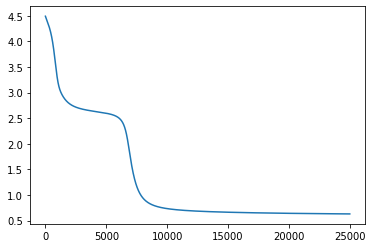

In [4]:
err =[]
for i in range(25000):
    z2, a2, z3, a3 = forward(X, w1, w2, B1, B2)
    #print(a2.shape)
    #print(a3.shape)
    #y_hat = zeroones(a3)
    err.append(loss(a3, Y))

    w1, w2 = backward(X, Y, w1, w2, 0.01, B1, B2)
    #print(dw2.shape)
    #print(w2.shape)
    #print([w1, w2])

plt.figure()
plt.plot(err)
print (f'The predicted output is:')
print(a3)
# Accuracy
print('\nÇonverting the y_prediction into zeros and ones:')
y_predicted = zeroones(a3)
print(y_predicted)
print (f'\nThe accuracy of the model is {ACC(y_predicted, Y)}')

**The model successfully trained with an accuracy of 100 %.**

##**Question 2:**

##**2a: Part1: Back Propagation**



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import accuracy_score as ACC



df = pd.read_excel("Concrete_Data.xls")
df.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


**The dataset is normalized here for better results.**

In [ ]:
dataset = df
normalized_dataset = dataset.apply(lambda val: (val -val.min())/(val.max() - val.min()), axis = 0)          
#normalized_dataset = dataset.apply(lambda rec: (rec-rec.mean())/rec.std(), axis = 0)
x_n = normalized_dataset.iloc[:,:-1].values
y_n = normalized_dataset.iloc[:,-1].values
normalized_dataset.head(2)
#The data is then divided into 60 - 40 train, test ratio.
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.4, random_state=4, stratify = None)
y_train_n = y_train_n.reshape(618, 1)
y_test_n = y_test_n.reshape(412, 1)

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigm_der(z):
    one = np.ones((z.shape))
    return z*(one-z)

def ReLu(z):
  return np.maximum(0, z)

def forward(x, w1, w2, B1, B2):
  z2 = x.dot(w1) + B1
  a2 = sigmoid(z2)
  #a2 = ReLu(z2)
  z3 = a2.dot(w2) + B2
  a3 = sigmoid(z3)
  #a3 = ReLu(z3)

  return z2, a2, z3, a3

def weight_init(x, y, n_h):  # n_h is the number of neurons in the hidden layer
  m, n = x.shape
  w1 = np.random.randn(n, n_h)
  w2 = np.random.randn(n_h, 1)
  B1 = np.random.randn(n_h)
  B2 = np.random.randn(1)

  return w1, w2, B1, B2

def loss(y_hat, y_true):
  return sum(-y_true*np.log(y_hat) - (1-y_true)*np.log(1-y_hat))



def backward(x, y, w1, w2, alpha, B1, B2):
  z2, a2, z3, a3 = forward(x, w1, w2, B1, B2)
  delta_3 = a3 -y
  dw2 = a2.T.dot(delta_3)  
  delta_2 = np.multiply(((w2.dot(delta_3.T))).T, np.multiply(a2, 1-a2)) 
  dw1 = x.T.dot(delta_2)
  w1 = w1 - alpha*dw1
  w2 = w2 - alpha*dw2

  dB2 = delta_3
  dB1 = delta_2

  B1 = B1 - alpha*dB1
  B2 = B2 - alpha*dB2
  return w1, w2 

def zeroones(y_pred):
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred < 0.5] = 0
  return y_pred

def prediction_cls(x_test, y_test, w1_final, w2_final, b1_final, b2_final):
  z2f, a2f, a3f, a3f = forward(x_test, w1_final, w2_final, b1_final, b2_final)
  acc = ACC(a3f, y_test)
  return acc

def prediction_reg(x_test, y_test, w1_final, w2_final, b1_final, b2_final):
  z2f, a2f, a3f, a3f = forward(x_test, w1_final, w2_final, b1_final, b2_final)
  r2s = R2(a3f, y_test)
  return r2s


Model is trained here. (**4 neorons are used in the hidden layer**)

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train_n, y_train_n, 4)
for i in range(20000):
    z2, a2, z3, a3 = forward(x_train_n, w1, w2, B1, B2)

    err.append(loss(a3, y_train_n))

    w1, w2 = backward(x_train_n, y_train_n, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.7867230072876967
Test data R2 score is 0.7720671762307129


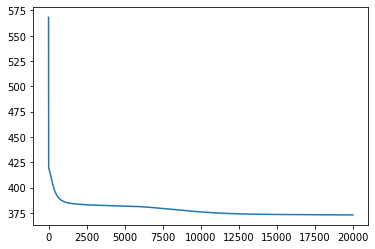

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train_n)}')
plt.figure
plt.plot(err)

print(f'Test data R2 score is {prediction_reg(x_test_n, y_test_n, w1, w2, B1, B2)}')

The from scratch implementation has
  
  4 neorons were included in the hidden layer
  
  R2 score  = 78.3 %

**2a: Part2: Pytorch Implementation**

In [5]:
import torch
import math
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as R2
from sklearn.metrics import accuracy_score as ACC


In [8]:
n_input, n_hidden, n_out, batch_size, learning_rate = 8, 4, 1, 1, 0.01

In [7]:
df = pd.read_excel("Concrete_Data.xls")
df.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [9]:
dataset = df
normalized_dataset = dataset.apply(lambda val: (val -val.min())/(val.max() - val.min()), axis = 0)          

x_n = normalized_dataset.iloc[:,:-1].values
y_n = normalized_dataset.iloc[:,-1].values

In [10]:

x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.4, random_state=4, stratify = None)
m, n = x_train_n.shape

y_train_n = y_train_n.reshape(m, 1 )

x_train_nt = torch.tensor(x_train_n, dtype = torch.float32)
y_train_nt = torch.tensor(y_train_n, dtype = torch.float32)



In [11]:
model = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=4, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)


In [12]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
losses = []
for epoch in range(200000):
    pred_y = model(x_train_nt)
    loss = loss_function(pred_y, y_train_nt)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()

    optimizer.step()

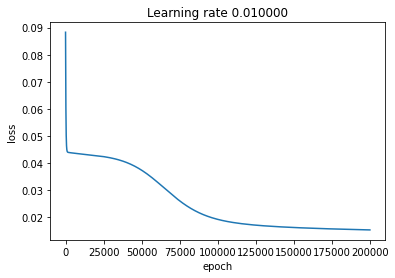

'The accuracy of is 0.6477016972587342'

In [15]:
y_pr = pred_y.detach().numpy()


plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

(f'The accuracy of is {R2(y_train_n, y_pr)}')


The pyorch implementation and from scratch implementation performs similarly. We might be able to achieve better fit with more parameter optimization.

##**2 b: Hyperparameter Optimization**

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25, stratify = None)
y_train = y_train.reshape(721, 1)
y_test = y_test.reshape(309, 1)


dataset = df
normalized_dataset = dataset.apply(lambda val: (val -val.min())/(val.max() - val.min()), axis = 0)          
#normalizing the dataset
x_n = normalized_dataset.iloc[:,:-1].values
y_n = normalized_dataset.iloc[:,-1].values
normalized_dataset.head(2)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.0,0.0,0.0,0.321357,0.07764,0.694767,0.20572,0.074176,0.967445
1,1.0,0.0,0.0,0.321357,0.07764,0.738372,0.20572,0.074176,0.741964


In [ ]:
#q2:b1
x_train, x_test_1, y_train, y_test_1 = train_test_split(x_n, y_n, test_size=0.4, random_state=25, stratify = None)
#y_train = y_train.reshape(721, 1)
#y_test = y_test.reshape(309, 1)

In [ ]:
y_train = y_train.reshape(618, 1)

In [ ]:
x_test, x_val, y_test, y_val = train_test_split(x_test_1, y_test_1, test_size=0.5, random_state=25, stratify = None)
y_val = y_val.reshape(206, 1)
y_test = y_test.reshape(206, 1)


**1. checking the performance for 2 neurons**

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigm_der(z):
    one = np.ones((z.shape))
    return z*(one-z)

def ReLu(z):
  return np.maximum(0, z)

def forward(x, w1, w2, B1, B2):
  z2 = x.dot(w1) + B1
  a2 = sigmoid(z2)
  #a2 = ReLu(z2)
  z3 = a2.dot(w2) + B2
  a3 = sigmoid(z3)
  #a3 = ReLu(z3)

  return z2, a2, z3, a3

def weight_init(x, y, n_h):  # n_h is the number of neurons in the hidden layer
  m, n = x.shape
  w1 = np.random.randn(n, n_h)
  w2 = np.random.randn(n_h, 1)
  B1 = np.random.randn(n_h)
  B2 = np.random.randn(1)

  return w1, w2, B1, B2

def loss(y_hat, y_true):
  return sum(-y_true*np.log(y_hat) - (1-y_true)*np.log(1-y_hat))
  #return -y_true.T.dot(np.log(y_hat)) - (1-y_true).T.dot(np.log(1-y_hat))


def backward(x, y, w1, w2, alpha, B1, B2):
  z2, a2, z3, a3 = forward(x, w1, w2, B1, B2)
  delta_3 = a3 -y
  dw2 = a2.T.dot(delta_3)  
  delta_2 = np.multiply(((w2.dot(delta_3.T))).T, np.multiply(a2, 1-a2)) 
  dw1 = x.T.dot(delta_2)
  w1 = w1 - alpha*dw1
  w2 = w2 - alpha*dw2

  dB2 = delta_3
  dB1 = delta_2

  B1 = B1 - alpha*dB1
  B2 = B2 - alpha*dB2
  return w1, w2 

def zeroones(y_pred):
  y_pred[y_pred > 0.5] = 1
  y_pred[y_pred < 0.5] = 0
  return y_pred

def prediction_cls(x_test, y_test, w1_final, w2_final, b1_final, b2_final):
  z2f, a2f, a3f, a3f = forward(x_test, w1_final, w2_final, b1_final, b2_final)
  acc = ACC(a3f, y_test)
  return acc

def prediction_reg(x_test, y_test, w1_final, w2_final, b1_final, b2_final):
  z2f, a2f, a3f, a3f = forward(x_test, w1_final, w2_final, b1_final, b2_final)
  r2s = R2(a3f, y_test)
  return r2s


In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 2)
for i in range(20000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.7779547673169115
validation data R2 score is 0.6952460604446471
Test data R2 score is 0.7002459462130278


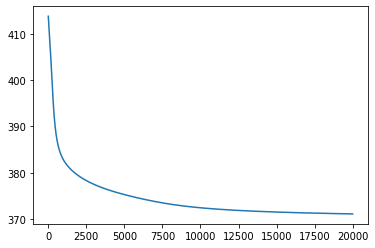

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**2. checking the performance for 10 neurons**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 10)
for i in range(20000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.8443031352493453
validation data R2 score is 0.7808326743437422
Test data R2 score is 0.7804784270313179


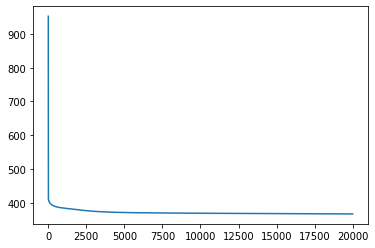

In [ ]:
# Accuracy with 10 neurons
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**3. checking the performance for 4 neurons**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 4)
for i in range(20000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.8241240957401056
validation data R2 score is 0.735006871907403
Test data R2 score is 0.7544398312550381


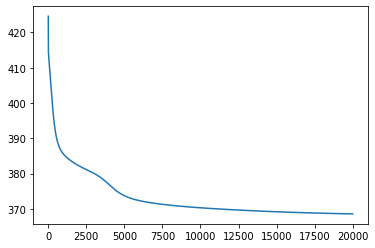

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**4. checking the performance for 25 neurons**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 25)
for i in range(20000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.85447727099553
validation data R2 score is 0.7775209547030093
Test data R2 score is 0.7894232306260246


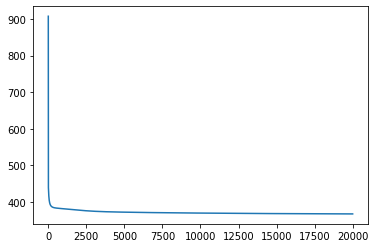

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**Observations from experimenting using number of neurons in hidden layer:**

1. with increase in number of nuerons, the performance of the model increased.

2. so taking the optimal number of neurons as per the experiments above as 25 and now experimenting the epochs

optimizing the number of epochs:
1. checking the performance for 25 neurons and different number of epochs

200 epoch

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 25)
for i in range(200):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.1580632741311151
validation data R2 score is 0.07376518381885488
Test data R2 score is 0.25462573005211553


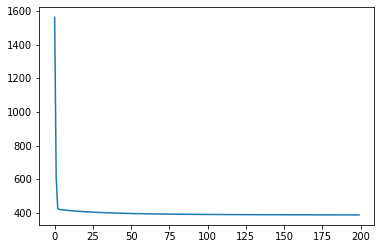

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**with decrease in number of epoch to 200, the performance drastically decreased**

**now increasing the number of epochs to 2000**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 25)
for i in range(2000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.5764822636335849
validation data R2 score is 0.5215062607953653
Test data R2 score is 0.5700270600092952


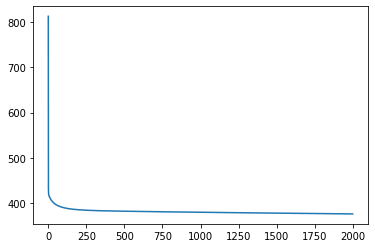

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**number of epoch increased further to 40000**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 25)
for i in range(40000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


Train data R2 score is 0.5764822636335849
validation data R2 score is 0.5215062607953653
Test data R2 score is 0.5700270600092952


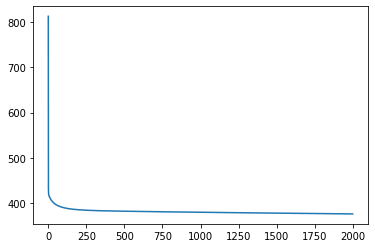

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**with increase in epoch the performance improved**

**increasing the number of epoch to 60000**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 25)
for i in range(60000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.001, B1, B2)


In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**observations with number of epochs:**
1. the optimal can be observed at around 60000 epoch. now changing the learning rate

**now optimizing the learning rate:**

**decreasing the learning rate to 0.0001**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 25)
for i in range(60000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.0001, B1, B2)


In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**with decrease in lr, performance decreased**

**increasing the learning rate further to 0.01**

In [ ]:
err =[]
w1, w2, B1, B2 = weight_init(x_train, y_train, 25)
for i in range(60000):
    z2, a2, z3, a3 = forward(x_train, w1, w2, B1, B2)

    err.append(loss(a3, y_train))

    w1, w2 = backward(x_train, y_train, w1, w2, 0.01, B1, B2)


In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**increasing the learning rate increased the performance**

In [ ]:
# Accuracy
print (f'Train data R2 score is {R2(a3,y_train)}')
plt.figure
plt.plot(err)

print(f'validation data R2 score is {prediction_reg(x_val, y_val, w1, w2, B1, B2)}')
print(f'Test data R2 score is {prediction_reg(x_test, y_test, w1, w2, B1, B2)}')

**final observations in fine tuning:**

1. with increase in number of neurons in hidden layer, the model performance improved. this maybe due to increased capacity of the model in the single hidden layer, more on this can be observed in further parts.
2. with increase in epochs the performance improved.
3. for very smaller learning rates (0.001,0.0001...), do not result in optimal model. increasing the learning rate to 0.01 improved the performance.

##**2 c: Comparison with linear and Quadratic Regression**

**The R2 score achieved using the linear model is 62.33% and with quadratic model is 73.15 %.**

**The optimal neural network model achieved an R2 score of 82.9 %.**
**There may be room for further improvement in the neural network, but it can be seen that the neural network is performing better than both the previously implemented model.**

##**2d: part 1: Multilayer Perceptron**



**2d: part 1: Multilayer Perceptron**



In [ ]:
def initialize(X, Y, n_list): 
  #n_list is the list of neurons per hidden layer in that order(Not including the first layer).
  #make a dictionary of weights with layer number as the key
  m, n = X.shape
  n_list.insert(0, n)
  n_layers = len(n_list)
  layers = dict()
  
  for i in range(n_layers):
    layers[i+1] = n_list[i]
  print(f'The layers and the neurons per those layers (layer no: no. of neurons): {layers}')

  # weights initialization
  w_dict = dict()
  b_dict = dict()
  for i in range(n_layers -1):
    n1 = layers[i+1]
    n2 = layers[i+2]
    w_dict[i+1] = np.random.randn(n1, n2)
    b_dict[i+1] = np.random.randn()
  print('Wights and Biases for each layer generated Succesfully')

  return layers, w_dict, b_dict




def looping(x, y, w_dict, b_dict, n_layers, alpha):
                                                              # forward pass
  z_val = dict()
  a_val = dict()
  a_val[1] = x
  for i in range(len(w_dict)):
    z_val[i+2] = a_val[i+1].dot(w_dict[i+1]) + b_dict[i+1]
    a_val[i+2] = (sigmoid(z_val[i+2]))
  #print('Forward pass')
                                                                
  y_hat = a_val[n_layers]
  delta_val = dict()
  ind = n_layers 
  delta_val[ind] = -(y-y_hat)
 # print(delta_val[ind].shape)
  dw_val = dict()
  db_val = dict()
  dw_val[ind-1] = a_val[ind -1].T.dot(delta_val[ind]) 
  db_val[ind-1] = np.sum(delta_val[ind], axis = 0, keepdims =True)
  #db_val[ind-1] = delta_val[ind]
  
  for i in range(1, len(w_dict)):
    delta_val[ind-i] = np.multiply(((w_dict[ind-i]).dot((delta_val[ind-i+1]).T)).T , np.multiply(a_val[ind-i],(1-a_val[ind-i])))
    dw_val[ind-1-i] = (a_val[ind-1-i].T).dot(delta_val[ind-i])/m
    db_val[ind-1-i]  = np.sum(delta_val[ind-i], axis = 0, keepdims =True)/m

# update weights
  for k in range(len(w_dict)): 
    w_dict[i+1] = w_dict[i+1] - alpha*dw_val[i+1]
    b_dict[i+1] = b_dict[i+1] - alpha*db_val[i+1]
  #print('weights updated')
  return w_dict, b_dict, y_hat # these are the updated weights


def prediction(X, Y, W_dict, b_dict):
  n_layers = len(W_dict)+1
  z_val = dict()
  a_val = dict()
  a_val[1] = X
  for i in range(len(W_dict)):
    z_val[i+2] = a_val[i+1].dot(w_dict[i+1]) + b_dict[i+1]
    a_val[i+2] = (sigmoid(z_val[i+2]))
  y_pred = a_val[n_layers]
  bce = sum(-Y*np.log(y_pred) - (1-Y)*np.log(1-y_pred))
  return y_pred


In [ ]:
df = pd.read_excel("Concrete_Data.xls")
df.head(2)
dataset = df
normalized_dataset = dataset.apply(lambda val: (val -val.min())/(val.max() - val.min()), axis = 0)       

x_n = normalized_dataset.iloc[:,:-1].values
y_n = normalized_dataset.iloc[:,-1].values

x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.4, random_state=4, stratify = None)
m, n = x_train_n.shape

# new_col = np.ones((len(x_train_n),1))
# x_train_n = np.append(x_train_n, new_col, axis=1)

# new_col = np.ones((len(x_test_n),1))
# x_test_n = np.append(x_test_n, new_col, axis=1)


y_train_n = y_train_n.reshape(m, 1 )
y_test_n = y_test_n.reshape(412, 1)
X = x_train_n
Y= y_train_n

**Structure 1: 1 hidden layer, 4 nerons in the hidden layer**

The layers and the neurons per those layers (layer no: no. of neurons): {1: 8, 2: 4, 3: 1}
Wights and Biases for each layer generated Succesfully
completed 14999 iterations
Train data R2 score  is -6.750754764217254
Test data R2 score is -7.291799741671062


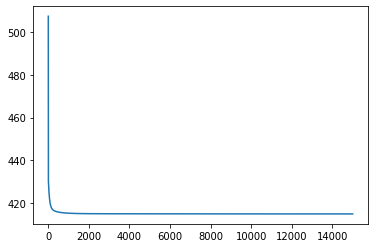

In [ ]:
l = list([4,1])
layer_dict, w_dict, b_dict = initialize(X, Y, l )

#print(b_dict[4]),

epoch = 15000
loss_bce = []
for i in range(epoch):
  w_dict, b_dict, y_hat = looping(X, Y, w_dict, b_dict, n_layers = len(l), alpha = 0.001)
  #print(b_dict[4].shape)
  loss = (sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat)))
  loss_bce.append(loss)
print(f'completed {i} iterations')
import matplotlib.pyplot as plt
plt.figure
plt.plot(loss_bce)

#print(f'The predictions are:\n {y_bin}')
# Accuracy

y_pred_tr = prediction(x_train_n, y_train_n, w_dict, b_dict)
print (f'Train data R2 score  is {R2(y_pred_tr, Y )}')



y_predicted_te = prediction(x_test_n, y_test_n, w_dict, b_dict)

print(f'Test data R2 score is {R2(y_predicted_te, y_test_n)}')



**Structure 2: 1 hidden layer 25 neurons**

The layers and the neurons per those layers (layer no: no. of neurons): {1: 8, 2: 25, 3: 1}
Wights and Biases for each layer generated Succesfully
completed 14999 iterations
Train data R2 score  is 0.3829125317953006
Test data R2 score is 0.2959587532629858


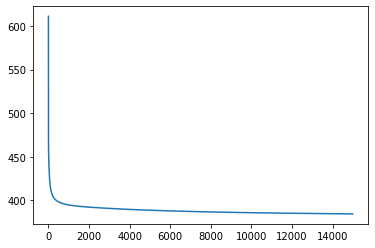

In [ ]:
l = list([25,1])
layer_dict, w_dict, b_dict = initialize(X, Y, l )

#print(b_dict[4]),

epoch = 15000
loss_bce = []
for i in range(epoch):
  w_dict, b_dict, y_hat = looping(X, Y, w_dict, b_dict, n_layers = len(l), alpha = 0.001)
  #print(b_dict[4].shape)
  loss = (sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat)))
  loss_bce.append(loss)
print(f'completed {i} iterations')
import matplotlib.pyplot as plt
plt.figure
plt.plot(loss_bce)

#print(f'The predictions are:\n {y_bin}')
# Accuracy

y_pred_tr = prediction(x_train_n, y_train_n, w_dict, b_dict)
print (f'Train data R2 score  is {R2(y_pred_tr, Y )}')



y_predicted_te = prediction(x_test_n, y_test_n, w_dict, b_dict)

print(f'Test data R2 score is {R2(y_predicted_te, y_test_n)}')

structure 3: 50 neurons in one hidden layer

The layers and the neurons per those layers (layer no: no. of neurons): {1: 8, 2: 50, 3: 1}
Wights and Biases for each layer generated Succesfully
completed 14999 iterations
Train data R2 score  is -0.4709749639964196
Test data R2 score is -0.6082071156408067


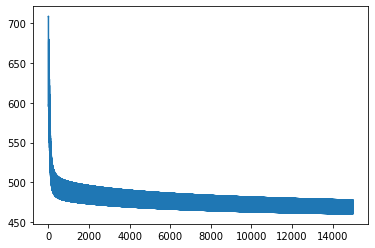

In [ ]:
l = list([50,1])
layer_dict, w_dict, b_dict = initialize(X, Y, l )

#print(b_dict[4]),

epoch = 15000
loss_bce = []
for i in range(epoch):
  w_dict, b_dict, y_hat = looping(X, Y, w_dict, b_dict, n_layers = len(l), alpha = 0.001)
  #print(b_dict[4].shape)
  loss = (sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat)))
  loss_bce.append(loss)
print(f'completed {i} iterations')
import matplotlib.pyplot as plt
plt.figure
plt.plot(loss_bce)

#print(f'The predictions are:\n {y_bin}')
# Accuracy

y_pred_tr = prediction(x_train_n, y_train_n, w_dict, b_dict)
print (f'Train data R2 score  is {R2(y_pred_tr, Y )}')



y_predicted_te = prediction(x_test_n, y_test_n, w_dict, b_dict)

print(f'Test data R2 score is {R2(y_predicted_te, y_test_n)}')

8 - 25 - 8- 1 

The layers and the neurons per those layers (layer no: no. of neurons): {1: 8, 2: 25, 3: 8, 4: 1}
Wights and Biases for each layer generated Succesfully
completed 34999 iterations
Train data R2 score  is 0.2951174677599633
Test data R2 score is 0.21250686600861435


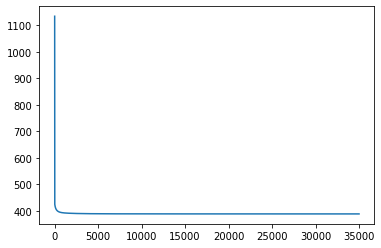

In [ ]:
l = list([25, 8, 1])
layer_dict, w_dict, b_dict = initialize(X, Y, l )

#print(b_dict[4]),

epoch = 35000
loss_bce = []
for i in range(epoch):
  w_dict, b_dict, y_hat = looping(X, Y, w_dict, b_dict, n_layers = len(l), alpha = 0.001)
  #print(b_dict[4].shape)
  loss = (sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat)))
  loss_bce.append(loss)
print(f'completed {i} iterations')
import matplotlib.pyplot as plt
plt.figure
plt.plot(loss_bce)

#print(f'The predictions are:\n {y_bin}')
# Accuracy

y_pred_tr = prediction(x_train_n, y_train_n, w_dict, b_dict)
print (f'Train data R2 score  is {R2(y_pred_tr, Y )}')



y_predicted_te = prediction(x_test_n, y_test_n, w_dict, b_dict)

print(f'Test data R2 score is {R2(y_predicted_te, y_test_n)}')

The layers and the neurons per those layers (layer no: no. of neurons): {1: 8, 2: 25, 3: 8, 4: 4, 5: 1}
Wights and Biases for each layer generated Succesfully
completed 14999 iterations
Train data R2 score  is -2.8847212252234105
Test data R2 score is -2.942565133477845


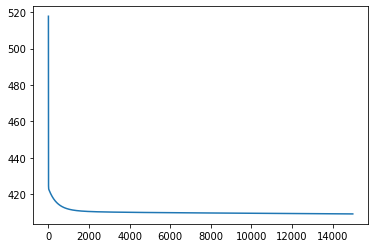

In [ ]:
l = list([25, 8,4, 1])
layer_dict, w_dict, b_dict = initialize(X, Y, l )

#print(b_dict[4]),

epoch = 15000
loss_bce = []
for i in range(epoch):
  w_dict, b_dict, y_hat = looping(X, Y, w_dict, b_dict, n_layers = len(l), alpha = 0.001)
  #print(b_dict[4].shape)
  loss = (sum(-Y*np.log(y_hat) - (1-Y)*np.log(1-y_hat)))
  loss_bce.append(loss)
print(f'completed {i} iterations')
import matplotlib.pyplot as plt
plt.figure
plt.plot(loss_bce)

#print(f'The predictions are:\n {y_bin}')
# Accuracy

y_pred_tr = prediction(x_train_n, y_train_n, w_dict, b_dict)
print (f'Train data R2 score  is {R2(y_pred_tr, Y )}')



y_predicted_te = prediction(x_test_n, y_test_n, w_dict, b_dict)

print(f'Test data R2 score is {R2(y_predicted_te, y_test_n)}')

**2d: Part2: Pytorch Implementation**

In [24]:
import torch
import math
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as R2
from sklearn.metrics import accuracy_score as ACC


In [25]:
df = pd.read_excel("Concrete_Data.xls")
df.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366


In [26]:
dataset = df
normalized_dataset = dataset.apply(lambda val: (val -val.min())/(val.max() - val.min()), axis = 0)          

x_n = normalized_dataset.iloc[:,:-1].values
y_n = normalized_dataset.iloc[:,-1].values

In [27]:

x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y_n, test_size=0.4, random_state=4, stratify = None)
m, n = x_train_n.shape

y_train_n = y_train_n.reshape(m, 1 )

x_train_nt = torch.tensor(x_train_n, dtype = torch.float32)
y_train_nt = torch.tensor(y_train_n, dtype = torch.float32)



In [41]:
n_input, n_hidden, n_out, batch_size, learning_rate = 8, 25, 1, 64, 0.001
model_d = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden, n_out),
                      nn.Sigmoid())
print(model_d)

Sequential(
  (0): Linear(in_features=8, out_features=25, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=25, out_features=1, bias=True)
  (3): Sigmoid()
)


In [42]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
losses = []
for epoch in range(200):
    pred_y = model_d(x_train_nt)
    loss = loss_function(pred_y, y_train_nt)
    losses.append(loss.item())

    model_d.zero_grad()
    loss.backward()

    optimizer.step()

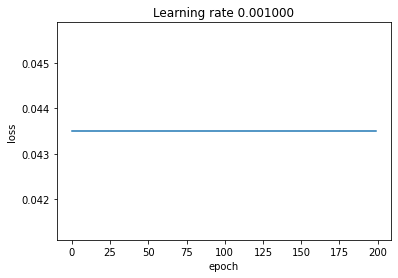

'The accuracy of is -0.004836299632164476'

In [43]:
y_pr = pred_y.detach().numpy()


plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

(f'The accuracy of is {R2(y_train_n, y_pr)}')

**2 hidden layers**


In [45]:
n_input, n_hidden_1, n_hidden_2, n_out, batch_size, learning_rate = 8, 25, 64, 1, 10, 0.01

model_1 = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden_1, n_hidden_2),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden_2, n_out),
                      nn.Sigmoid())
print(model_1)

Sequential(
  (0): Linear(in_features=8, out_features=25, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=25, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=1, bias=True)
  (5): Sigmoid()
)


In [38]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [46]:
losses = []
for epoch in range(200000):
    pred_y = model_1(x_train_nt)
    loss = loss_function(pred_y, y_train_nt)
    losses.append(loss.item())

    model_1.zero_grad()
    loss.backward()

    optimizer.step()

In [47]:
y_pr = pred_y.detach().numpy()


(f'The accuracy of is {R2(y_train_n, y_pr)}')


'The accuracy of is -0.38585752940190177'

In [48]:
n_input, n_hidden_1, n_hidden_2,n_hidden_3, n_out, batch_size, learning_rate = 8, 25, 64,64,1, 10, 0.01

model_2 = nn.Sequential(nn.Linear(n_input, n_hidden),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden_1, n_hidden_2),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden_2, n_hidden_3),
                      nn.Sigmoid(),
                      nn.Linear(n_hidden_3, n_out),
                      nn.Sigmoid())
print(model_2)

Sequential(
  (0): Linear(in_features=8, out_features=25, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=25, out_features=64, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=64, out_features=1, bias=True)
  (7): Sigmoid()
)


In [49]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [50]:
losses = []
for epoch in range(20000):
    pred_y = model_2(x_train_nt)
    loss = loss_function(pred_y, y_train_nt)
    losses.append(loss.item())

    model_2.zero_grad()
    loss.backward()

    optimizer.step()

In [51]:
y_pr = pred_y.detach().numpy()


(f'The accuracy of is {R2(y_train_n, y_pr)}')


'The accuracy of is -0.05909866716033063'

observations:

1. increasing the number of hidden layers did not improve the model much.

2. but it cannot be said for sure that increasing the number of hidden layers will not improve the performance as it might take a lot of trial and error to arrive at a better combination of number of hidden layers and the neurons in these layers.

3. with the above implementation of pytorch, it can be seen that more number of iterations are required to gain good performance of the model.

4. 2 hidden layers with 25 and 8 neurons respectively and 3 hidden layers with 25 , 64 , 64 neurons in hidden layers respectively were used to observe the performance of the model, but this performance did not improve the performance.

5. also, increasing the number of neurons in hidden layer (depth) was found to improve the performance more than increasing the width of the model.